<div align="center">

<h1 style="color:#7B68EE; font-weight:bold; font-family:sans-serif;">
✦✦✦✦✦✦✦✦✦✦✦✦✦✦✦✦✦✦✦✦✦✦✦✦✦✦✦✦✦✦✦✦✦✦✦✦✦✦✦✦✦✦✦✦✦✦✦✦✦✦✦✦✦✦<br>
🌟 ML - Classification Implementation 🌟<br>
✦✦✦✦✦✦✦✦✦✦✦✦✦✦✦✦✦✦✦✦✦✦✦✦✦✦✦✦✦✦✦✦✦✦✦✦✦✦✦✦✦✦✦✦✦✦✦✦✦✦✦✦✦✦
</h1>

</div>

#Day 3

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt # for data visualization
import seaborn as sns # for statistical data visualization
%matplotlib inline

### Dataset Preparation

In [3]:
data = 'sample_data/pulsar_stars.csv'
df = pd.read_csv(data)

In [5]:
df.shape

(17898, 9)

In [4]:
df.head()

,Mean of the integrated profile,Standard deviation of the integrated profile,Excess kurtosis of the integrated profile,Skewness of the integrated profile,Mean of the DM-SNR curve,Standard deviation of the DM-SNR curve,Excess kurtosis of the DM-SNR curve,Skewness of the DM-SNR curve,target_class
0,140.562500,55.683782,-0.234571,-0.699648,3.199833,19.110426,7.975532,74.242225,0
1,102.507812,58.882430,0.465318,-0.515088,1.677258,14.860146,10.576487,127.393580,0
2,103.015625,39.341649,0.323328,1.051164,3.121237,21.744669,7.735822,63.171909,0
3,136.750000,57.178449,-0.068415,-0.636238,3.642977,20.959280,6.896499,53.593661,0
4,88.726562,40.672225,0.600866,1.123492,1.178930,11.468720,14.269573,252.567306,0




We can see that there are 9 variables in the dataset. 8 are continuous variables and 1 is discrete variable. The discrete variable is target_class variable. It is also the target variable.

In [7]:
# view the column names of the dataframe to check for leading and trailing spaces.
col_names = df.columns
col_names

Index([' Mean of the integrated profile',
       ' Standard deviation of the integrated profile',
       ' Excess kurtosis of the integrated profile',
       ' Skewness of the integrated profile', ' Mean of the DM-SNR curve',
       ' Standard deviation of the DM-SNR curve',
       ' Excess kurtosis of the DM-SNR curve', ' Skewness of the DM-SNR curve',
       'target_class'],
      dtype='object')

In [9]:
# We can see that there are leading spaces (spaces at the start of the string name) in the dataframe.
# So, We will remove these leading spaces.
# remove leading spaces from column names
df.columns = df.columns.str.strip()

# view column names again
df.columns

Index(['Mean of the integrated profile',
       'Standard deviation of the integrated profile',
       'Excess kurtosis of the integrated profile',
       'Skewness of the integrated profile', 'Mean of the DM-SNR curve',
       'Standard deviation of the DM-SNR curve',
       'Excess kurtosis of the DM-SNR curve', 'Skewness of the DM-SNR curve',
       'target_class'],
      dtype='object')

In [11]:
# rename column names
df.columns = ['IP Mean', 'IP Sd', 'IP Kurtosis', 'IP Skewness',
              'DM-SNR Mean', 'DM-SNR Sd', 'DM-SNR Kurtosis', 'DM-SNR Skewness', 'target_class']

# view the renamed column names
df.columns

Index(['IP Mean', 'IP Sd', 'IP Kurtosis', 'IP Skewness', 'DM-SNR Mean',
       'DM-SNR Sd', 'DM-SNR Kurtosis', 'DM-SNR Skewness', 'target_class'],
      dtype='object')

We can see that the column names are shortened. IP stands for integrated profile and DM-SNR stands for delta modulation and signal to noise ratio. Now, it is much more easy to work with the columns.

In [12]:
#Our target variable is the target_class column. So, I will check its distribution.
# check distribution of target_class column

df['target_class'].value_counts()

,count
target_class,
0,16259
1,1639


In [14]:
# view the percentage distribution of target_class column

df['target_class'].value_counts()/float(len(df)) #np.float

,count
target_class,
0,0.908426
1,0.091574


We can see that percentage of observations of the class label 0 and 1 is 90.84% and 9.16%. So, this is a class imbalanced problem. I will deal with that in later section.

In [15]:
# view summary of dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17898 entries, 0 to 17897
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   IP Mean          17898 non-null  float64
 1   IP Sd            17898 non-null  float64
 2   IP Kurtosis      17898 non-null  float64
 3   IP Skewness      17898 non-null  float64
 4   DM-SNR Mean      17898 non-null  float64
 5   DM-SNR Sd        17898 non-null  float64
 6   DM-SNR Kurtosis  17898 non-null  float64
 7   DM-SNR Skewness  17898 non-null  float64
 8   target_class     17898 non-null  int64  
dtypes: float64(8), int64(1)
memory usage: 1.2 MB


In [16]:
### check for missing values in variables
df.isnull().sum()

,0
IP Mean,0
IP Sd,0
IP Kurtosis,0
IP Skewness,0
DM-SNR Mean,0
DM-SNR Sd,0
DM-SNR Kurtosis,0
DM-SNR Skewness,0
target_class,0


We can see that there are no missing values in the dataset and all the variables are numerical variables.

In [17]:
# view summary statistics in numerical variables

round(df.describe(),2)

,IP Mean,IP Sd,IP Kurtosis,IP Skewness,DM-SNR Mean,DM-SNR Sd,DM-SNR Kurtosis,DM-SNR Skewness,target_class
count,17898.00,17898.00,17898.00,17898.00,17898.00,17898.00,17898.00,17898.00,17898.00
mean,111.08,46.55,0.48,1.77,12.61,26.33,8.30,104.86,0.09
std,25.65,6.84,1.06,6.17,29.47,19.47,4.51,106.51,0.29
min,5.81,24.77,-1.88,-1.79,0.21,7.37,-3.14,-1.98,0.00
25%,100.93,42.38,0.03,-0.19,1.92,14.44,5.78,34.96,0.00
50%,115.08,46.95,0.22,0.20,2.80,18.46,8.43,83.06,0.00
75%,127.09,51.02,0.47,0.93,5.46,28.43,10.70,139.31,0.00
max,192.62,98.78,8.07,68.10,223.39,110.64,34.54,1191.00,1.00


Text(0, 0.5, 'DM-SNR Skewness')

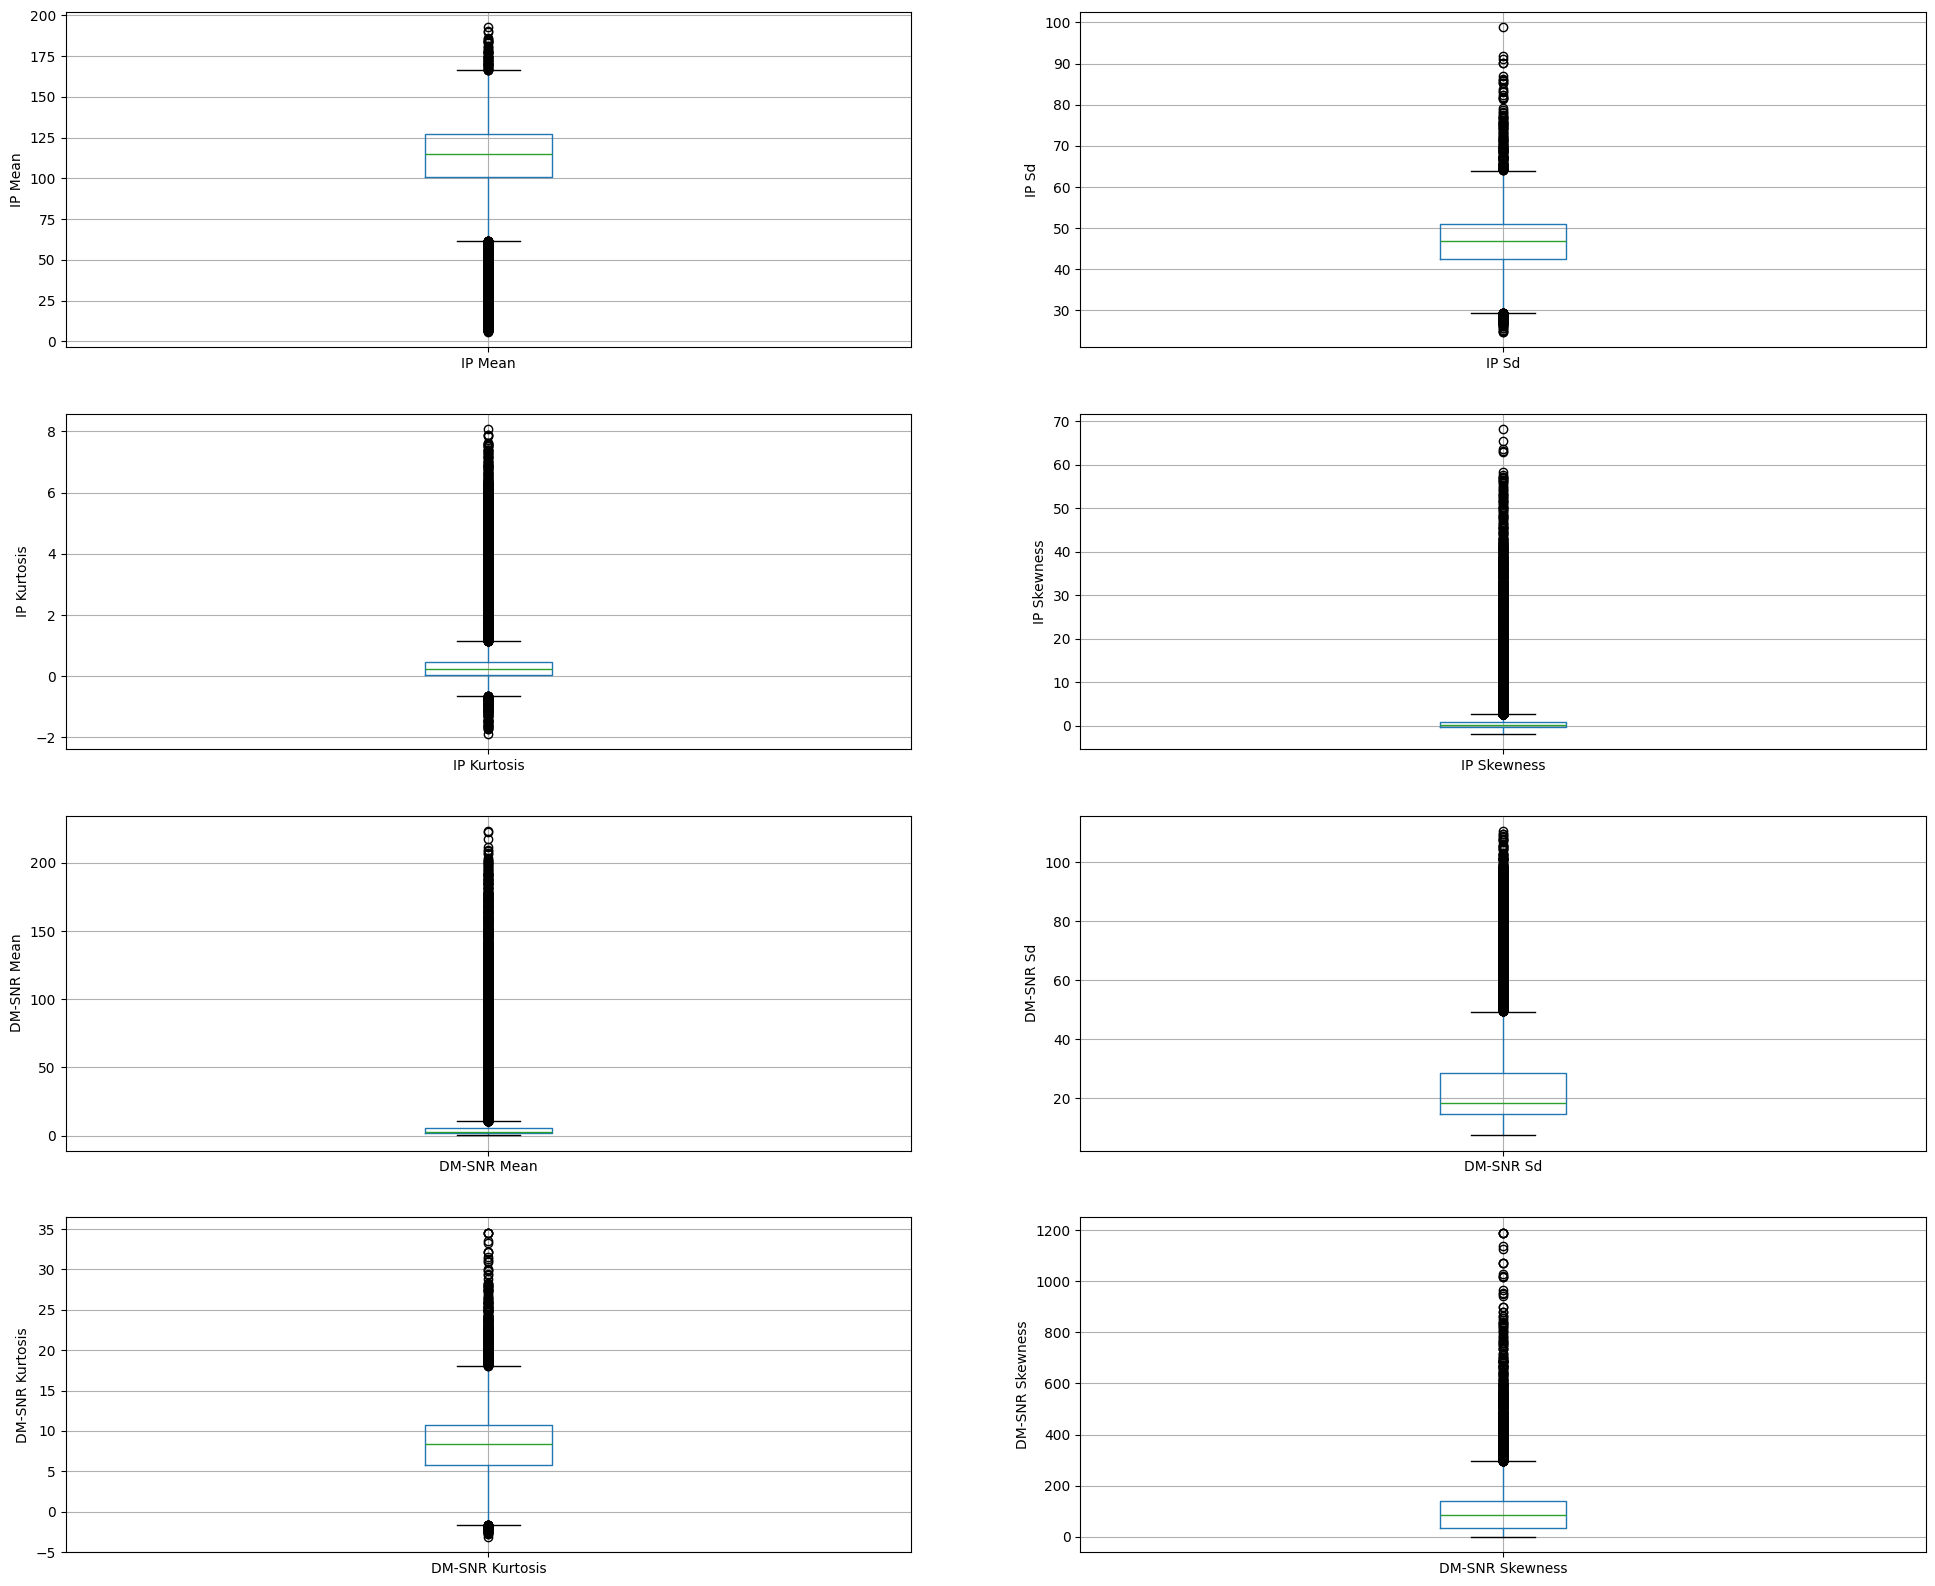

In [18]:
# draw boxplots to visualize outliers

plt.figure(figsize=(24,20))

plt.subplot(4, 2, 1)
fig = df.boxplot(column='IP Mean')
fig.set_title('')
fig.set_ylabel('IP Mean')

plt.subplot(4, 2, 2)
fig = df.boxplot(column='IP Sd')
fig.set_title('')
fig.set_ylabel('IP Sd')

plt.subplot(4, 2, 3)
fig = df.boxplot(column='IP Kurtosis')
fig.set_title('')
fig.set_ylabel('IP Kurtosis')

plt.subplot(4, 2, 4)
fig = df.boxplot(column='IP Skewness')
fig.set_title('')
fig.set_ylabel('IP Skewness')

plt.subplot(4, 2, 5)
fig = df.boxplot(column='DM-SNR Mean')
fig.set_title('')
fig.set_ylabel('DM-SNR Mean')

plt.subplot(4, 2, 6)
fig = df.boxplot(column='DM-SNR Sd')
fig.set_title('')
fig.set_ylabel('DM-SNR Sd')

plt.subplot(4, 2, 7)
fig = df.boxplot(column='DM-SNR Kurtosis')
fig.set_title('')
fig.set_ylabel('DM-SNR Kurtosis')

plt.subplot(4, 2, 8)
fig = df.boxplot(column='DM-SNR Skewness')
fig.set_title('')
fig.set_ylabel('DM-SNR Skewness')

- **Positive and Negative Outliers**: Many of the plots, such as 'IP Mean', 'IP Kurtosis', and 'DM-SNR Skewness', show outliers on both the positive (upper) and negative (lower) ends of the distribution.

- **Skewness**: The presence of outliers far from the central box suggests a skewed distribution. For example, in 'DM-SNR Kurtosis', the large number of outliers above the upper whisker indicates a strong positive skew.

- **Magnitude of Outliers**: The distance of the outlier points from the central box gives an idea of their magnitude. In some plots, like 'DM-SNR Kurtosis', the outliers are extremely far from the main body of the data.

Text(0, 0.5, 'Number of pulsar stars')

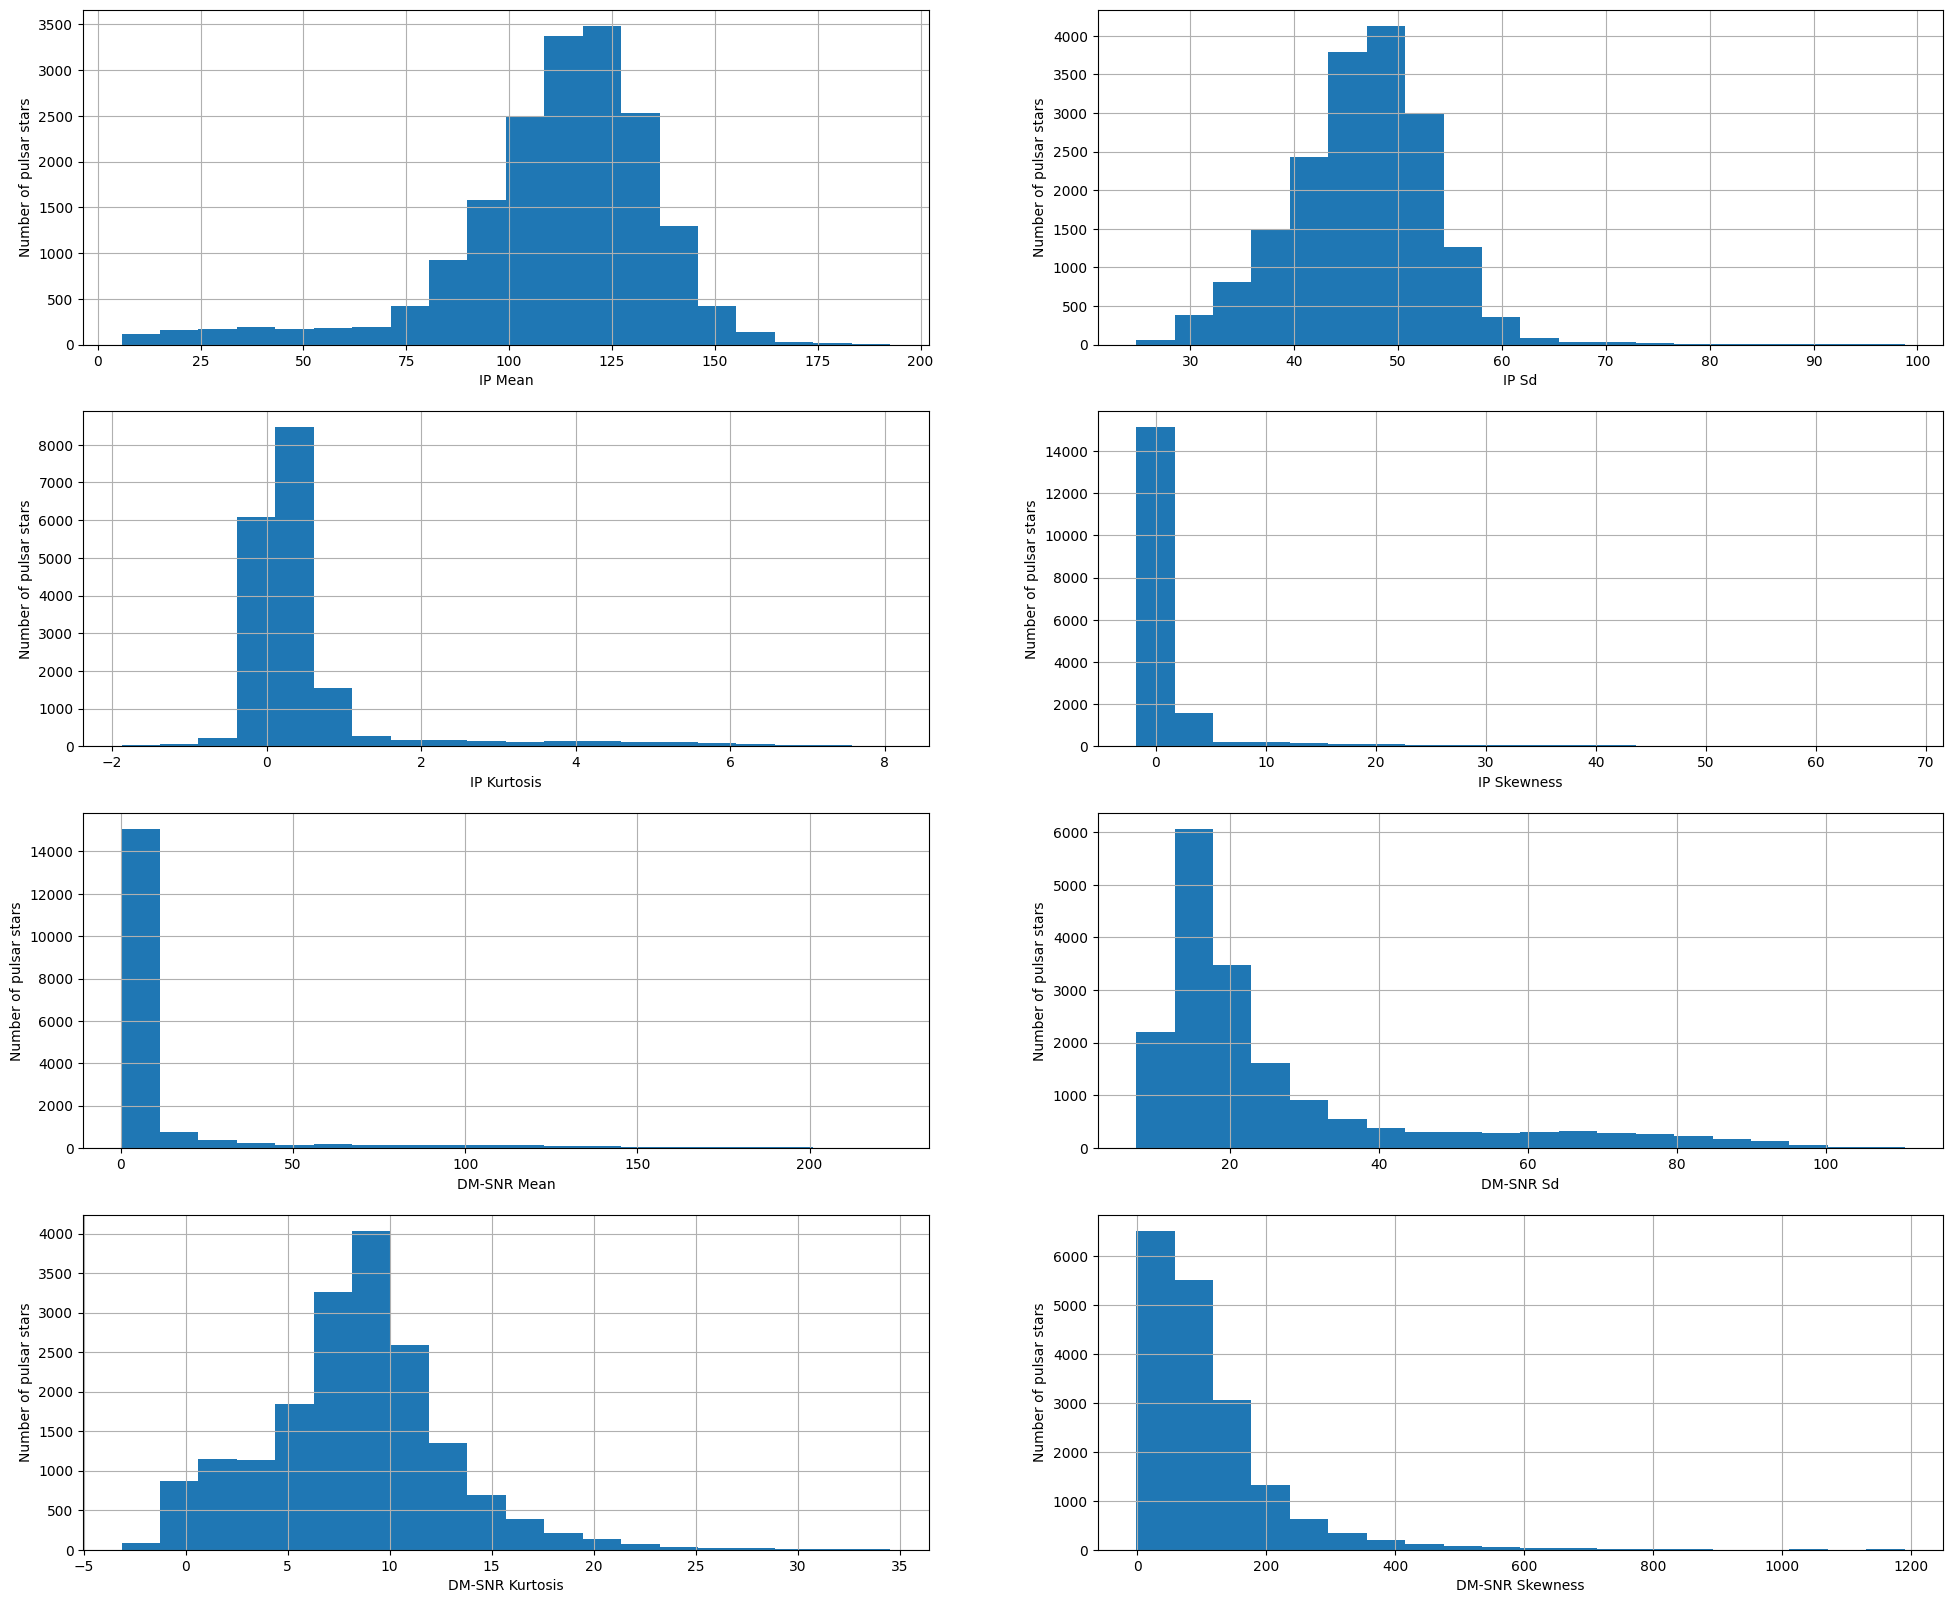

In [21]:
# plot histogram to check distribution
plt.figure(figsize=(24,20))

plt.subplot(4, 2, 1)
fig = df['IP Mean'].hist(bins=20)
fig.set_xlabel('IP Mean')
fig.set_ylabel('Number of pulsar stars')

plt.subplot(4, 2, 2)
fig = df['IP Sd'].hist(bins=20)
fig.set_xlabel('IP Sd')
fig.set_ylabel('Number of pulsar stars')

plt.subplot(4, 2, 3)
fig = df['IP Kurtosis'].hist(bins=20)
fig.set_xlabel('IP Kurtosis')
fig.set_ylabel('Number of pulsar stars')

plt.subplot(4, 2, 4)
fig = df['IP Skewness'].hist(bins=20)
fig.set_xlabel('IP Skewness')
fig.set_ylabel('Number of pulsar stars')

plt.subplot(4, 2, 5)
fig = df['DM-SNR Mean'].hist(bins=20)
fig.set_xlabel('DM-SNR Mean')
fig.set_ylabel('Number of pulsar stars')

plt.subplot(4, 2, 6)
fig = df['DM-SNR Sd'].hist(bins=20)
fig.set_xlabel('DM-SNR Sd')
fig.set_ylabel('Number of pulsar stars')

plt.subplot(4, 2, 7)
fig = df['DM-SNR Kurtosis'].hist(bins=20)
fig.set_xlabel('DM-SNR Kurtosis')
fig.set_ylabel('Number of pulsar stars')

plt.subplot(4, 2, 8)
fig = df['DM-SNR Skewness'].hist(bins=20)
fig.set_xlabel('DM-SNR Skewness')
fig.set_ylabel('Number of pulsar stars')

We can see that all the 8 continuous variables are skewed.

**Summary of numerical variables**


- There are 9 numerical variables in the dataset.


- 8 are continuous variables and 1 is discrete variable.


- The discrete variable is `target_class` variable. It is also the target variable.


- There are no missing values in the dataset.

In [22]:
#Declare Feature Vector and Target Variable
X = df.drop(['target_class'], axis=1)
y = df['target_class']

In [23]:
# split X and y into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [24]:
# check the shape of X_train and X_test
X_train.shape, X_test.shape

((14318, 8), (3580, 8))

In [35]:
from sklearn.model_selection import train_test_split

# Keep as DataFrame
X_train, X_test, y_train, y_test = train_test_split(df.drop('target_class', axis=1),
                                                    df['target_class'],
                                                    test_size=0.2)

cols = X_train.columns # 1. Get the column names from the original DataFrame before scaling

In [44]:
#Feature Scaling
from sklearn.preprocessing import StandardScaler

# 2. Initialize and fit the scaler
scaler = StandardScaler()

# 3. Fit and transform the training data, and just transform the test data
# Note: This returns a NumPy array
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 4. Convert the scaled NumPy arrays back into pandas DataFrames
#    using the column names you saved earlier.
#X_train = pd.DataFrame(X_train_scaled, columns=[cols])
#X_test = pd.DataFrame(X_test_scaled, columns=[cols])

#Display
X_train.describe()

,IP Mean,IP Sd,IP Kurtosis,IP Skewness,DM-SNR Mean,DM-SNR Sd,DM-SNR Kurtosis,DM-SNR Skewness
count,1.252800e+04,1.252800e+04,1.252800e+04,1.252800e+04,1.252800e+04,1.252800e+04,1.252800e+04,1.252800e+04
mean,5.388056e-18,2.864177e-17,2.268655e-18,1.134327e-17,-6.805965e-18,-6.522383e-18,-2.325371e-17,1.673133e-17
std,1.000040e+00,1.000040e+00,1.000040e+00,1.000040e+00,1.000040e+00,1.000040e+00,1.000040e+00,1.000040e+00
min,-4.114549e+00,-3.202064e+00,-2.213838e+00,-5.779791e-01,-4.223681e-01,-9.741604e-01,-2.544347e+00,-9.987806e-01
25%,-3.983889e-01,-6.139142e-01,-4.250221e-01,-3.183217e-01,-3.629168e-01,-6.093538e-01,-5.607509e-01,-6.527543e-01
50%,1.574108e-01,6.349803e-02,-2.391766e-01,-2.561147e-01,-3.322466e-01,-4.000342e-01,2.344924e-02,-2.072990e-01
75%,6.282085e-01,6.641922e-01,-8.380699e-03,-1.386158e-01,-2.404183e-01,1.106737e-01,5.328143e-01,3.218748e-01
max,3.196536e+00,6.685068e+00,7.126013e+00,1.072369e+01,7.331207e+00,4.363723e+00,5.816932e+00,1.011035e+01


We now have X_train dataset ready to be fed into the Logistic Regression classifier

##Logisitic Regression

In [45]:
# Train logistic regression (with class balancing)
model = LogisticRegression(class_weight='balanced', solver='liblinear', random_state=42)
model.fit(X_train_scaled, y_train)

# Predictions
y_pred = model.predict(X_test)
y_proba = model.predict_proba(X_test_scaled)[:, 1]

| Parameter          | Value         | Meaning                                                                                                            | Why It’s Used Here                                                                                                |
| ------------------ | ------------- | ------------------------------------------------------------------------------------------------------------------ | ----------------------------------------------------------------------------------------------------------------- |
| **`class_weight`** | `'balanced'`  | Automatically assigns weights to each class inversely proportional to their frequency in the dataset.              | Handles the heavy class imbalance (90% non-pulsar vs. 10% pulsar) so the model doesn’t ignore the minority class. |
| **`solver`**       | `'liblinear'` | Optimization algorithm used to train Logistic Regression. Works well for small datasets and binary classification. | Stable choice for binary problems with class weights; good for our dataset size.                                  |
| **`random_state`** | `42`          | Seed for random number generation to make results reproducible.                                                    | Ensures the same results each run for consistency and comparison.                                                 |


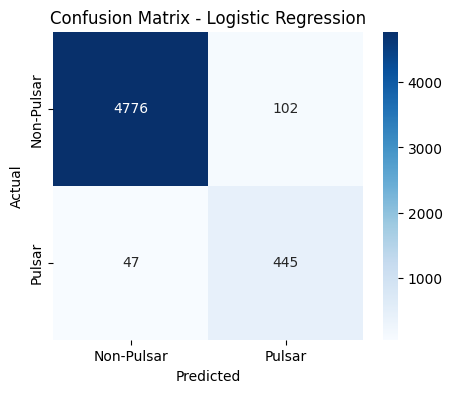

In [51]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Non-Pulsar', 'Pulsar'],
            yticklabels=['Non-Pulsar', 'Pulsar'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - Logistic Regression")
plt.show()
#True Negative (TN) = 4776 → Actual = Non-Pulsar, Predicted = Non-Pulsar
#False Positive (FP) = 102 → Actual = Non-Pulsar, Predicted = Pulsar
#False Negative (FN) = 47 → Actual = Pulsar, Predicted = Non-Pulsar
#True Positive (TP) = 445 → Actual = Pulsar, Predicted = Pulsar

In [52]:
# Evaluation
print("\n--> Model Performance:")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("ROC AUC:", roc_auc_score(y_test, y_proba))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


--> Model Performance:
Accuracy: 0.9722532588454376
ROC AUC: 0.975813091464248

Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.98      0.98      4878
           1       0.81      0.90      0.86       492

    accuracy                           0.97      5370
   macro avg       0.90      0.94      0.92      5370
weighted avg       0.97      0.97      0.97      5370



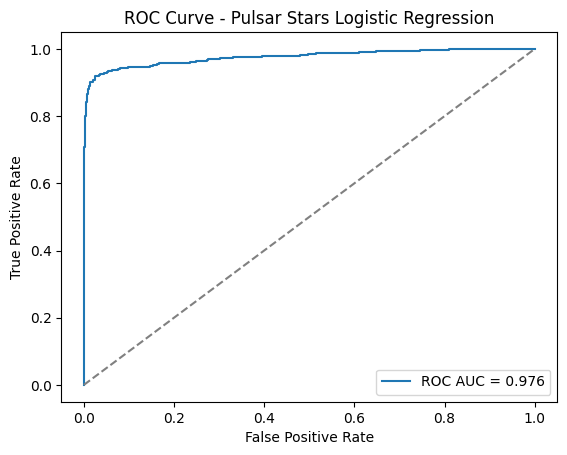

In [47]:
# Plot ROC curve
fpr, tpr, _ = roc_curve(y_test, y_proba)
plt.plot(fpr, tpr, label=f"ROC AUC = {roc_auc_score(y_test, y_proba):.3f}")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.plot([0, 1], [0, 1], '--', color='gray')
plt.legend()
plt.title("ROC Curve - Pulsar Stars Logistic Regression")
plt.show()

##K-NN

In [82]:
# Step 1: Import libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [83]:
# Step 2: Load dataset
# You can download the HTRU2 dataset from UCI ML repository or use a CSV file
data = pd.read_csv('sample_data/diabetes.csv')

In [59]:
# Step 3: Separate features and target
X = data.drop('Outcome', axis=1)  # assuming target column is 'Outcome'
y = data['Outcome']

In [66]:
# Step 4: Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [90]:
# Step 5: Feature scaling (important for KNN)
scaler = StandardScaler()
#scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [108]:
# Step 6: Train KNN classifier
knn = KNeighborsClassifier(n_neighbors=3)  # weights='distance' you can tune k
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [109]:
# Step 7: Make predictions
y_pred_knn = knn.predict(X_test)
y_proba_knn = model.predict_proba(X_test)[:, 1]

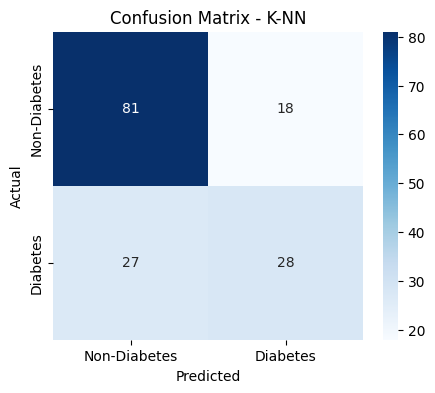

In [110]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred_knn)
plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Non-Diabetes', 'Diabetes'],
            yticklabels=['Non-Diabetes', 'Diabetes'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - K-NN")
plt.show()
#True Negative (TN) =  → Actual = Non-Diabetes, Predicted = Non-Diabetes
#False Positive (FP) = → Actual = Non-Diabetes, Predicted = Diabetes
#False Negative (FN) = → Actual = Diabetes, Predicted = Non-Diabetes
#True Positive (TP) =  → Actual = Diabetes, Predicted = Diabetes

In [111]:
# Step 8: Evaluate model
print("Accuracy:", accuracy_score(y_test, y_pred_knn))
print("\nClassification Report:\n", classification_report(y_test, y_pred_knn))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_knn))

Accuracy: 0.7077922077922078

Classification Report:
               precision    recall  f1-score   support

           0       0.75      0.82      0.78        99
           1       0.61      0.51      0.55        55

    accuracy                           0.71       154
   macro avg       0.68      0.66      0.67       154
weighted avg       0.70      0.71      0.70       154


Confusion Matrix:
 [[81 18]
 [27 28]]


In [112]:
print("ROC AUC:", roc_auc_score(y_test, y_proba_knn))

ROC AUC: 0.538475665748393


**Optimization**

In [121]:
from sklearn.model_selection import GridSearchCV
# Step 1: Define parameter grid for optimization
param_grid = {
    'n_neighbors': range(1, 21),
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan']
}

# Step 2: GridSearchCV for best parameters (optimize for ROC-AUC)
grid = GridSearchCV(KNeighborsClassifier(), param_grid, cv=5, scoring='roc_auc')
grid.fit(X_train, y_train)

# Step 3: Get best estimator
print("Best Parameters:", grid.best_params_)
print("Best Score:", grid.best_score_)

Best Parameters: {'metric': 'manhattan', 'n_neighbors': 19, 'weights': 'distance'}
Best Score: 0.818993188001586


In [127]:
# Step 4: Predictions
y_pred_knn_opt = best_knn.predict(X_test)
y_prob_knn_opt = best_knn.predict_proba(X_test)[:, 1]

# Step 5: Evaluate model
print("Accuracy:", accuracy_score(y_test, y_pred_knn_opt))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_knn_opt))
#print("\nClassification Report:\n", classification_report(y_test, y_pred_knn_opt))

Accuracy: 0.7337662337662337

Confusion Matrix:
 [[84 15]
 [26 29]]


ROC-AUC: 0.7910009182736455


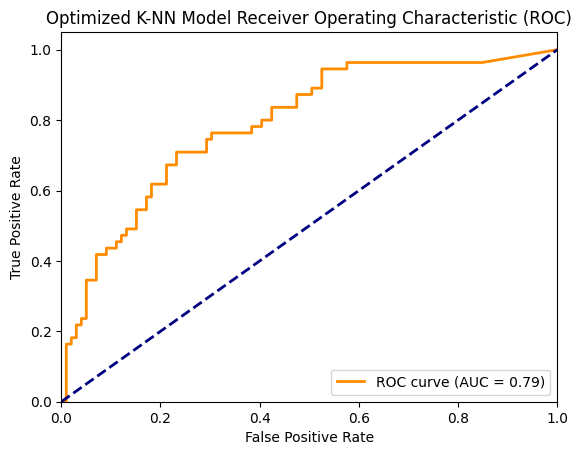

In [128]:
# ROC-AUC
roc_auc = roc_auc_score(y_test, y_prob_knn_opt)
print("ROC-AUC:", roc_auc)

fpr, tpr, thresholds = roc_curve(y_test, y_prob_knn_opt)
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (AUC = %.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Optimized K-NN Model Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()

##SVM

In [132]:
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score, roc_curve
import matplotlib.pyplot as plt

In [133]:
# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [134]:
# Default SVM
svm_default = SVC(probability=True, random_state=42)
svm_default.fit(X_train_scaled, y_train)

SVC(probability=True, random_state=42)

In [135]:
# Predictions
y_pred_def = svm_default.predict(X_test_scaled)
y_prob_def = svm_default.predict_proba(X_test_scaled)[:,1]

In [136]:
# Evaluation
print("=== Default SVM ===")
print("Accuracy:", accuracy_score(y_test, y_pred_def))
print("\nClassification Report:\n", classification_report(y_test, y_pred_def))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_def))

=== Default SVM ===
Accuracy: 0.7337662337662337

Classification Report:
               precision    recall  f1-score   support

           0       0.77      0.83      0.80        99
           1       0.65      0.56      0.60        55

    accuracy                           0.73       154
   macro avg       0.71      0.70      0.70       154
weighted avg       0.73      0.73      0.73       154


Confusion Matrix:
 [[82 17]
 [24 31]]


In [137]:
# ROC
roc_auc_def = roc_auc_score(y_test, y_prob_def)
print("ROC-AUC:", roc_auc_def)
#fpr, tpr, _ = roc_curve(y_test, y_prob_def)
#plt.plot(fpr, tpr, label=f'Default SVM (AUC={roc_auc_def:.2f})')


ROC-AUC: 0.805050505050505


**After Optimization**

In [138]:
from sklearn.model_selection import GridSearchCV

# Parameter grid for optimization
param_grid = {
    'C': [0.1, 1, 10, 100],
    'kernel': ['linear', 'rbf', 'poly'],
    'gamma': ['scale', 'auto']
}

# GridSearchCV
grid_svm = GridSearchCV(SVC(probability=True, random_state=42), param_grid, cv=5, scoring='roc_auc')
grid_svm.fit(X_train_scaled, y_train)

best_svm = grid_svm.best_estimator_
print("\nBest Parameters:", grid_svm.best_params_)


Best Parameters: {'C': 10, 'gamma': 'scale', 'kernel': 'linear'}


In [139]:
# Predictions
y_pred_opt = best_svm.predict(X_test_scaled)
y_prob_opt = best_svm.predict_proba(X_test_scaled)[:,1]

In [140]:
# Evaluation
print("=== Optimized SVM ===")
print("Accuracy:", accuracy_score(y_test, y_pred_opt))
print("\nClassification Report:\n", classification_report(y_test, y_pred_opt))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_opt))

=== Optimized SVM ===
Accuracy: 0.7597402597402597

Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.82      0.81        99
           1       0.67      0.65      0.66        55

    accuracy                           0.76       154
   macro avg       0.74      0.74      0.74       154
weighted avg       0.76      0.76      0.76       154


Confusion Matrix:
 [[81 18]
 [19 36]]


ROC-AUC: 0.8168044077134986


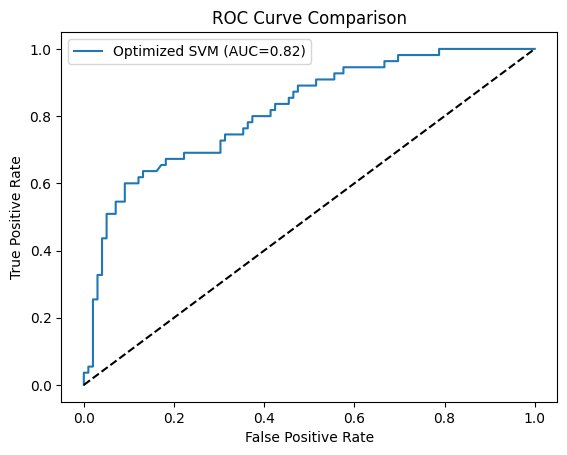

In [141]:
# ROC
roc_auc_opt = roc_auc_score(y_test, y_prob_opt)
print("ROC-AUC:", roc_auc_opt)
fpr_opt, tpr_opt, _ = roc_curve(y_test, y_prob_opt)
plt.plot(fpr_opt, tpr_opt, label=f'Optimized SVM (AUC={roc_auc_opt:.2f})')

# Plot both ROC curves together
plt.plot([0,1],[0,1],'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Comparison')
plt.legend()
plt.show()